In [31]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import math
from scipy.stats import chi2, norm 


Выбираем распределение $\chi ^{2}$(хи-квадрат) с $k$ степенями свободы.
Функция плотности вероятности имеет вид: $\frac{(1/2)^{k/2}}{\Gamma (k/2)}x^{k/2-1}e^{-x/2}$

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


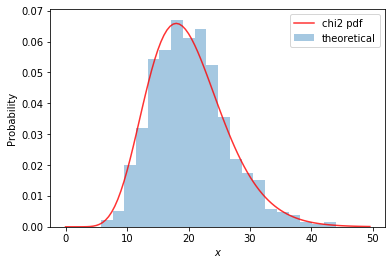

In [32]:
df = 20
r = chi2.rvs(df, size=1000)  #генерируем выборку объема 1000
x = np.arange(0.,50.,0.5)  #определяем массив точек для построения плотности распределения
#строим гистограмму и теоретическую плотность распределения 
plt.plot(x, chi2.pdf(x, df),'r', alpha=0.8, label='chi2 pdf')
plt.hist(r, 20, normed=True, histtype='stepfilled', alpha=0.4, label='theoretical')
plt.xlabel('$x$')
plt.ylabel('Probability')
plt.legend(loc='best')

Oценим распределение выборочного среднего вашей случайной
величины при разных объёмах выборок

В общем виде для кси-квадрат распределения матожидание равняется $EX=k$,а дисперсия $DX=2k$.
Задаем $k=20$, соответственно, $EX=20$ и $DX=40$.

В scipy.stats.norm распределение задается через $\mu$ и $\sigma$ поэтому мы считаем $\sqrt{DX/n}$, где n-размер выборки.

In [37]:
# создадим массив выборочных средних 1000 выборок размера 5 
size = [5]
sm = []
bins = np.arange(10.,30.,0.5)
i=1
while i <= 1000:
    rv = chi2.rvs(df, size=i)
    sm.append(np.mean(rv))
    i+=1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0, 0.5, 'Probability')

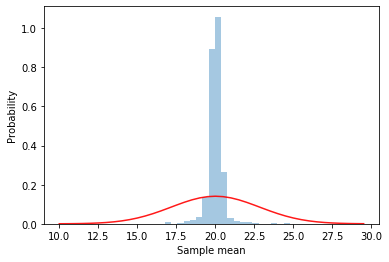

In [34]:
# построим гистограмму и график нормального распределения для выборки размера 5
plt.hist(sm, 20, normed=True, histtype='stepfilled', alpha=0.4, label='mean hist')
plt.plot(bins, norm.pdf(bins, df, np.sqrt(2*df/5)),'r', alpha=0.9, label='norm pdf')
plt.xlabel('Sample mean')
plt.ylabel('Probability')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'Probability')

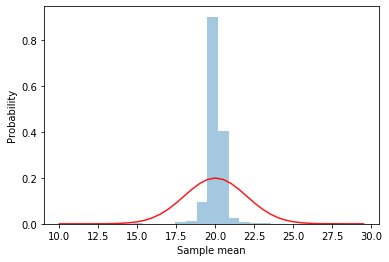

In [35]:
# построим гистограмму и график нормального распределения для выборки размера 10
size = [10]
sm = []
bins = np.arange(10.,30.,0.5)
i=1
while i <= 1000:
    rv = chi2.rvs(df, size=i)
    sm.append(np.mean(rv))
    i+=1
plt.hist(sm, 20, normed=True, histtype='stepfilled', alpha=0.4, label='mean hist')
plt.plot(bins, norm.pdf(bins, df, np.sqrt(2*df/10.)),'r', alpha=0.9, label='norm pdf')
plt.xlabel('Sample mean')
plt.ylabel('Probability')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.


Text(0, 0.5, 'Probability')

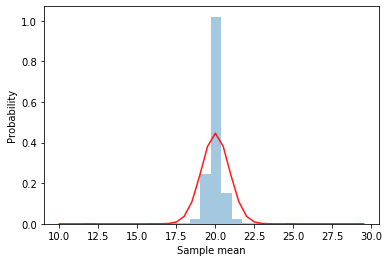

In [36]:
# построим гистограмму и график нормального распределения для выборки размера 50
size = [50]
sm = []
bins = np.arange(10.,30.,0.5)
i=1
while i <= 1000:
    rv = chi2.rvs(df, size=i)
    sm.append(np.mean(rv))
    i+=1
plt.hist(sm, 20, normed=True, histtype='stepfilled', alpha=0.4, label='mean hist')
plt.plot(bins, norm.pdf(bins, df, np.sqrt(2*df/50.)),'r', alpha=0.9, label='norm pdf')
plt.xlabel('Sample mean')
plt.ylabel('Probability')

In [ ]:
Выводы:
Центральная предельная теорема выполняются. Гистограмму распределения можно описать нормальным распределением с параметрами $(EX,DX/n)$.
Заметно, что при увеличении размера выборки гистограмма становится более похожей на нормальное распределение. 
Более качественный результат наблюдается при больших n.
Также можно увидеть, что дисперсия понижается (это очевидно из формул, но на графиках получается нагляднее).